# Laborbericht 3 - EMG Messungen Gruppe B1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from emg_preprocessing import *
import Lab3Functions
from scipy.signal import butter, filtfilt
import scipy.signal as sc


In [2]:
# Einlesen der Rohdaten
# Cell 1

# Daten Alexander
alex_mvc_1 = 'data/ALEX_MVC_1.csv'
alex_mvc_2 = 'data/ALEX_MVC_2.csv'
alex_mvc_3 = 'data/ALEX_MVC_3.csv'
fatigue_1 = 'data/ALEX_ermuedung_1.csv'
fatigue_2 = 'data/ALEX_ermuedung_2.csv'
fatigue_3 = 'data/ALEX_ermuedung_3.csv'
weight_1 = 'data/ALEX_RMA_leicht.csv'
weight_2 = 'data/ALEX_RMA_mittel.csv'
weight_3 = 'data/ALEX_RMA_schwer.csv'

# Daten Georg
georg_mvc_1 = 'data/GEORG_MVC_1.csv'
georg_mvc_2 = 'data/GEORG_MVC_2.csv'
georg_mvc_3 = 'data/GEORG_MVC_3.csv'

# Daten Amelie
amelie_mvc_1 = 'data/AMELIE_MVC_1.csv'
amelie_mvc_2 = 'data/AMELIE_MVC_2.csv'
amelie_mvc_3 = 'data/AMELIE_MVC_3.csv'

# Daten Thomas
tom_mvc_1 = 'data/TOM_MVC_1.csv'
tom_mvc_2 = 'data/TOM_MVC_2.csv'
tom_mvc_3 = 'data/TOM_MVC_3.csv'


In [3]:
def combine_csvs(file_list, output_filename):
    """
    Utility function:
    - Reads each CSV in file_list with header=None.
    - Concatenates them row-wise.
    - Saves to output_filename without header or index.
    """
    dfs = []
    for f in file_list:
        df = pd.read_csv(f, header=None)
        dfs.append(df)
    combined_df = pd.concat(dfs, axis=0, ignore_index=True)
    combined_df.to_csv(output_filename, index=False, header=False)

# --- ALEX ---
# 1) Combine ALEX MVC (3 files)
combine_csvs([alex_mvc_1, alex_mvc_2, alex_mvc_3], "data/ALEX_MVC_combined.csv")

# 2) Combine ALEX Fatigue
combine_csvs([fatigue_1, fatigue_2, fatigue_3], "data/FATIGUE_combined.csv")

# 3) Combine ALEX Weight
combine_csvs([weight_1, weight_2, weight_3], "data/WEIGHT_combined.csv")


# --- GEORG ---
# Combine Georg's 3 MVC files
combine_csvs([georg_mvc_1, georg_mvc_2, georg_mvc_3], "data/GEORG_MVC_combined.csv")

# --- AMELIE ---
combine_csvs([amelie_mvc_1, amelie_mvc_2, amelie_mvc_3], "data/AMELIE_MVC_combined.csv")

# --- THOMAS ---
combine_csvs([tom_mvc_1, tom_mvc_2, tom_mvc_3], "data/TOM_MVC_combined.csv")


datasets = {
    "Teilnehmer 1_MVC": "data/ALEX_MVC_combined.csv",
    "Teilnehmer 1_FATIGUE": "data/FATIGUE_combined.csv",
    "Teilnehmer 1_WEIGHT": "data/WEIGHT_combined.csv",
    "Teilnehmer 2_MVC": "data/GEORG_MVC_combined.csv",
    "Teilnehmer 3_MVC": "data/TOM_MVC_combined.csv",
    "Teilnehmer 4_MVC": "data/AMELIE_MVC_combined.csv"
}

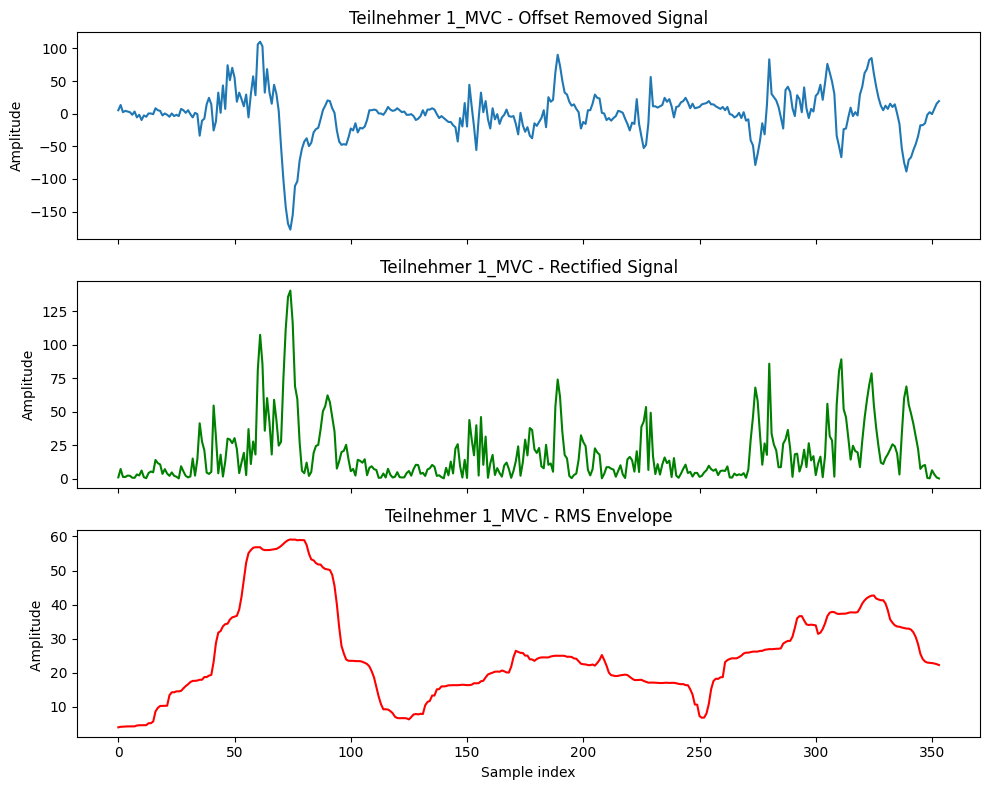

In [4]:
chosen_dataset = ("Teilnehmer 1_MVC")
process_and_plot_emg(
    csv_path=datasets[chosen_dataset],
    title=chosen_dataset,
    window_size=40
)

In [5]:
alex_mvc_filtered = filtered_signal(datasets["Teilnehmer 1_MVC"], 40)
georg_mvc_filtered = filtered_signal(datasets["Teilnehmer 2_MVC"], 20)
tom_mvc_filtered = filtered_signal(datasets["Teilnehmer 3_MVC"], 20)
amelie_mvc_filtered = filtered_signal(datasets["Teilnehmer 4_MVC"], 20)
alex_mvc_weight = filtered_signal(datasets["Teilnehmer 1_WEIGHT"], 20)

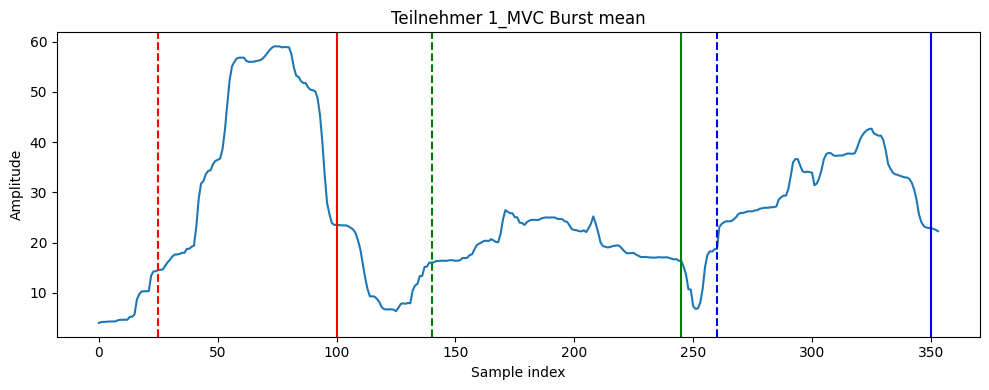

Mean burst1: 41.287
Mean burst2: 20.352
Mean burst3: 32.150
Overall mean: 31.263


In [6]:
# Mean Alex
mean_1_alex, mean_2_alex, mean_3_alex, overall_mean_alex= analyze_three_bursts(
    alex_mvc_filtered,
    start_1=25, end_1=100,
    start_2=140, end_2=245,
    start_3=260, end_3=350,
    title="Teilnehmer 1_MVC Burst mean"
)
max_teilnehmer_1 = np.max(alex_mvc_filtered)



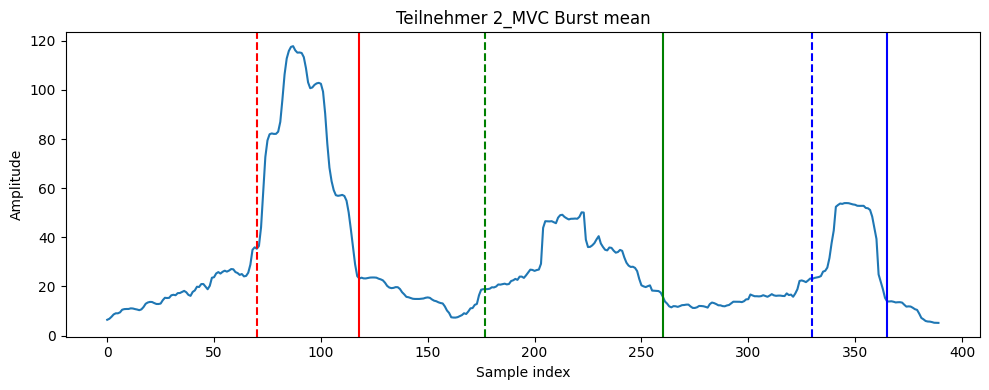

Mean burst1: 80.651
Mean burst2: 31.714
Mean burst3: 40.696
Overall mean: 51.020


In [7]:
# Mean Georg
mean_1_georg, mean_2_georg, mean_3_georg, overall_mean_georg= analyze_three_bursts(
    georg_mvc_filtered,
    start_1=70, end_1=118,
    start_2=177, end_2=260,
    start_3=330, end_3=365,
    title="Teilnehmer 2_MVC Burst mean"
)


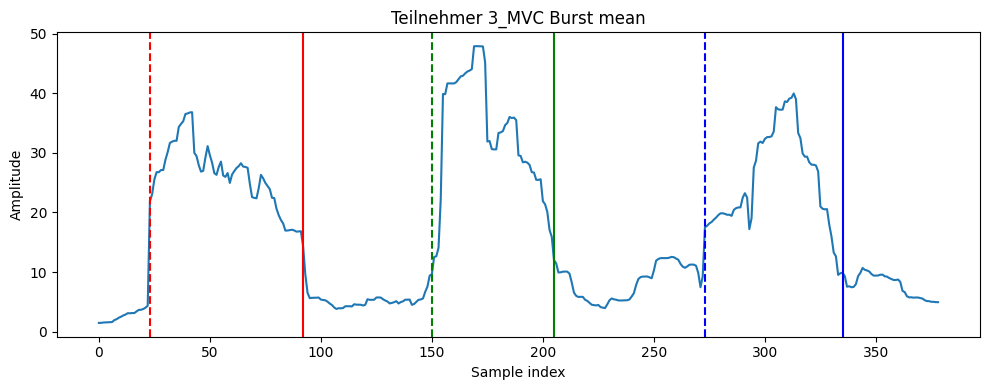

Mean burst1: 26.186
Mean burst2: 32.987
Mean burst3: 25.633
Overall mean: 28.268


In [8]:
# Mean Thomas
mean_1_tom, mean_2_tom, mean_3_tom, overall_mean_tom= analyze_three_bursts(
    tom_mvc_filtered,
    start_1=23, end_1=92,
    start_2=150, end_2=205,
    start_3=273, end_3=335,
    title="Teilnehmer 3_MVC Burst mean"
)


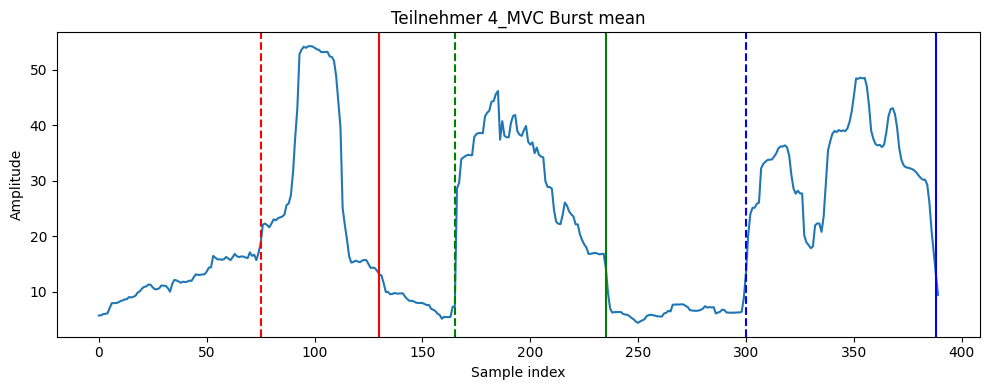

Mean burst1: 32.380
Mean burst2: 31.121
Mean burst3: 33.121
Overall mean: 32.208


In [9]:
# Mean Amelie
mean_1_amelie, mean_2_amelie, mean_3_amelie, overall_mean_amelie= analyze_three_bursts(
    amelie_mvc_filtered,
    start_1=75, end_1=130,
    start_2=165, end_2=235,
    start_3=300, end_3=388,
    title="Teilnehmer 4_MVC Burst mean"
)

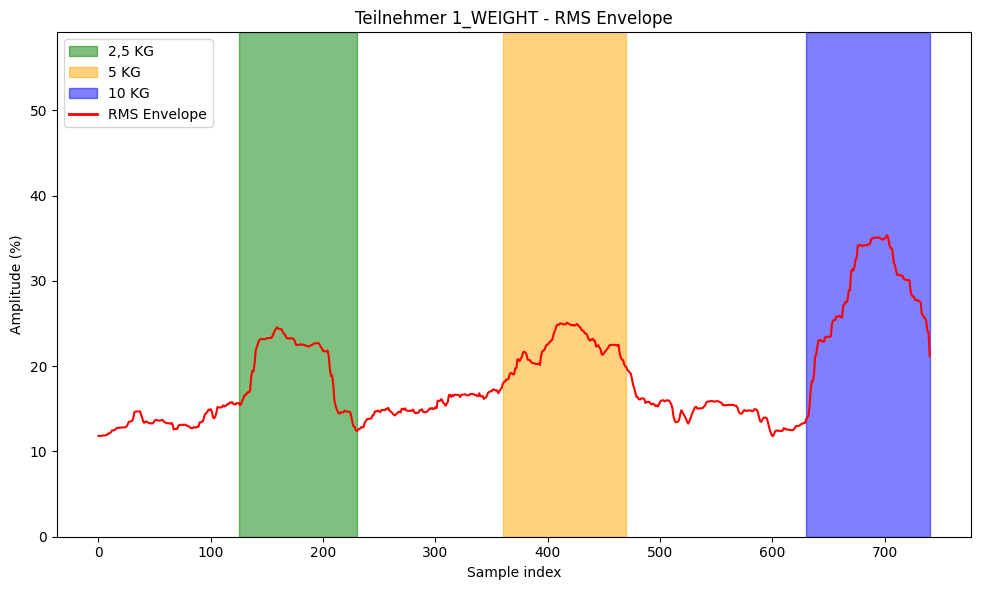

In [10]:
chosen_dataset = ("Teilnehmer 1_WEIGHT")
process_and_plot_emg_weight(
    csv_path=datasets[chosen_dataset],
    title=chosen_dataset,
    window_size=70,
    maximum_mvc=max_teilnehmer_1
)

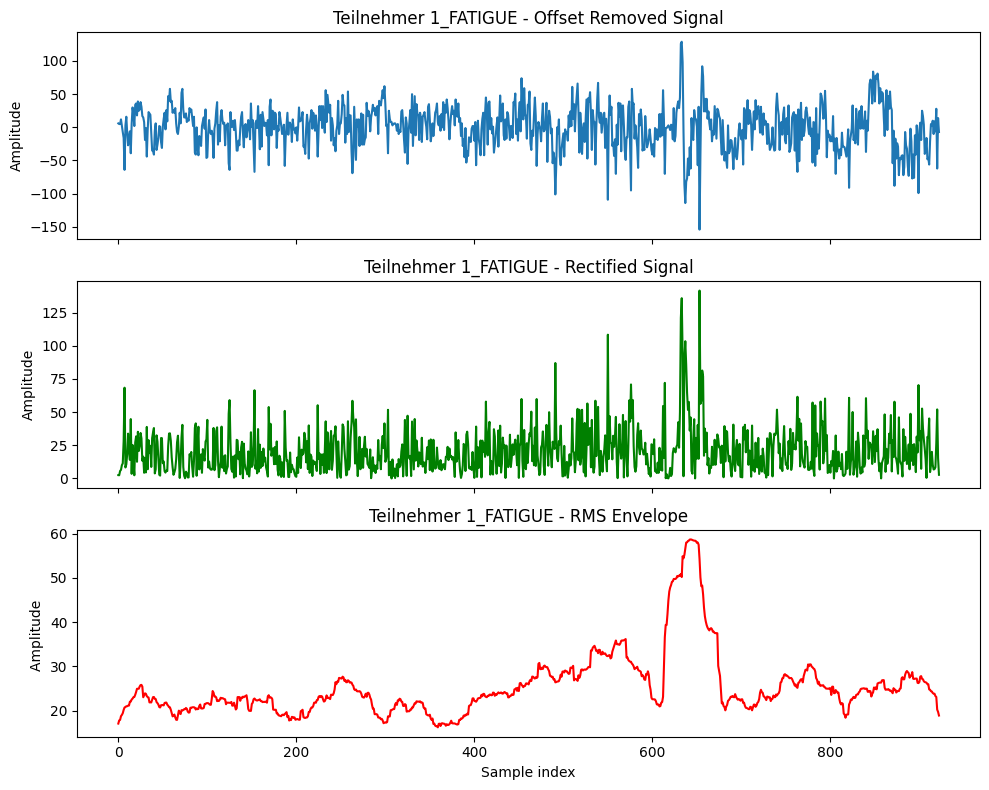

In [11]:
chosen_dataset = ("Teilnehmer 1_FATIGUE")
process_and_plot_emg(
    csv_path=datasets[chosen_dataset],
    title=chosen_dataset,
    window_size=40
)

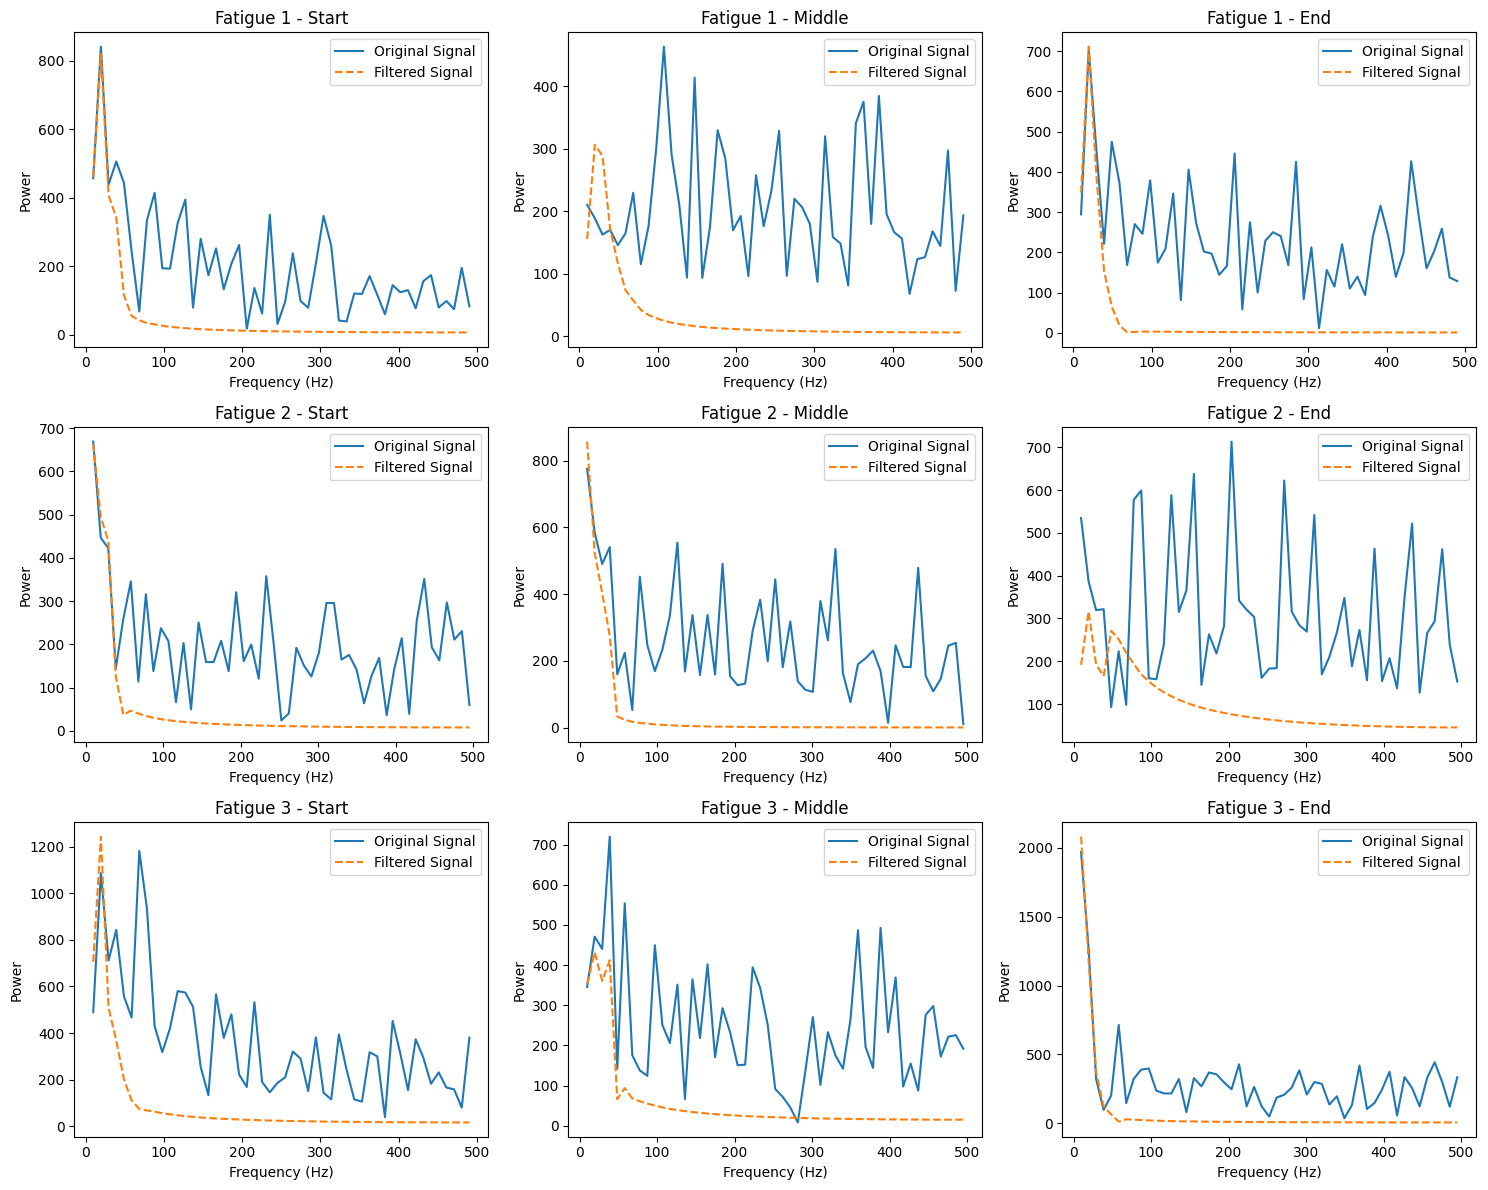

In [12]:
# Beispiel-Aufruf der Funktion mit drei fiktiven Datensätzen
fatigue_1 = load_and_process_data('data/ALEX_ermuedung_1.csv')  # Ersetze den Dateipfad mit dem tatsächlichen Pfad
fatigue_2 = load_and_process_data('data/ALEX_ermuedung_2.csv')
fatigue_3 = load_and_process_data('data/ALEX_ermuedung_3.csv')

plot_fatigue_fft(fatigue_1, fatigue_2, fatigue_3)